<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2022년-1학기-금융시장의-빅데이터-분석-중간고사(담당교수:-박석진)" data-toc-modified-id="2022년-1학기-금융시장의-빅데이터-분석-중간고사(담당교수:-박석진)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>2022년 1학기 금융시장의 빅데이터 분석 중간고사(담당교수: 박석진)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#상황-설명" data-toc-modified-id="상황-설명-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>상황 설명</a></span><ul class="toc-item"><li><span><a href="#데이터-설명" data-toc-modified-id="데이터-설명-1.0.1.1"><span class="toc-item-num">1.0.1.1&nbsp;&nbsp;</span>데이터 설명</a></span></li></ul></li></ul></li></ul></li></ul></div>

# 2022년 1학기 금융시장의 빅데이터 분석 중간고사(담당교수: 박석진)

첨부된 midterm_data.csv를 이용해 문제를 푸세요.

### 상황 설명

- 경기 순환(Business Cycle)이란, 거시적인 경제 활동 수준이 주기적으로 상승과 하강을 일컫는 말입니다.
- 여러분들은 펀드매니저로써, 이러한 경제 활동의 주기적인 변동을 포트폴리오 구성에 반영할 것인지 결정해야합니다.
- 경기 순환을 고려한 포트폴리오 구성이 유용한지 판단하기 위해, 여러분들은 간단한 실증분석을 진행합니다.
- 문제 풀이에 있어, 1년은 252일로 계산하며 무위험자산의 연간 수익률(annual risk free rate)은 1.5%로 계산합니다.

#### 데이터 설명
- midterm_data.csv는 2000.1부터 2020.12까지 여러 금융자산들의 일별 가격변화율(daily return)을 기록한 데이터며, 자산의 목록은 다음과 같습니다.
    - Spain 10Y: 스페인 국채 10년물
    - KOSPI: KOSPI 주가지수
    - SPY: S&P500 주가지수
    - crudeOilFutures: 원유 선물
    - naturalGasFutures: 천연가스 선물
    - goldFutures: 금 선물
    - copperFutures: 구리 선물

- business_cycle_label은 일자별로 경기가 확장기인지(1), 또는 후퇴기(0)인지를 기록한 데이터며 아래의 그림은 이를 시각화해서 보여줍니다.
<img src="./img/1.jpg" width="600" height="600">

(1) business_cycle_label.csv를 이용해 midterm_data.csv로 다음의 세 가지 pandas dataframe들을 생성하시오 (5점)

- df_up: 경기 확장기에만 해당하는 데이터
- df_down: 경기 후퇴기에만 해당하는 데이터
- df: 전체 데이터

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import pandas_datareader.data as web

In [2]:
# df_up
df = pd.read_csv("./midterm_data.csv")
up_cycle = pd.read_csv('./business_cycle_label.csv')
up_cycle = up_cycle['cycle'] == 1

df_up = df[up_cycle].set_index('Unnamed: 0')
df_up

,Spain 10Y,KOSPI,SPY,crudeOilFutures,naturalGasFutures,goldFutures,copperFutures
Unnamed: 0,,,,,,,
2000-01-03,-0.033410,0.000000,-0.009787,0.000000,0.000000,0.003478,0.000000
2000-01-04,-0.029896,0.030124,-0.039106,-0.001953,-0.053913,-0.021837,-0.017009
2000-01-05,0.002970,-0.068675,0.001789,-0.025049,-0.003676,-0.005138,0.011337
2000-01-06,0.005952,-0.025874,-0.016072,-0.005219,0.012915,0.000356,-0.002950
2000-01-07,-0.002978,-0.012635,0.058076,-0.022599,-0.010474,0.002314,0.000592
...,...,...,...,...,...,...,...
2020-12-26,-0.027024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-12-27,0.019165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-12-28,-0.002837,0.000620,0.008591,-0.012648,-0.076251,-0.002471,0.002386


In [3]:
# df_down
df = pd.read_csv("./midterm_data.csv")
down_cycle = pd.read_csv('./business_cycle_label.csv')
down_cycle = down_cycle['cycle'] == 0

df_down = df[down_cycle].set_index('Unnamed: 0')
df_down

,Spain 10Y,KOSPI,SPY,crudeOilFutures,naturalGasFutures,goldFutures,copperFutures
Unnamed: 0,,,,,,,
2000-04-03,0.003103,-0.016842,0.005819,-0.017472,-0.019015,-0.002870,-0.003125
2000-04-04,0.006221,-0.019233,-0.007438,-0.037079,-0.023191,0.023030,-0.010658
2000-04-05,0.018779,0.000000,-0.006245,0.014931,0.023388,-0.011607,-0.003169
2000-04-06,-0.018779,-0.031090,0.008693,-0.005420,0.023546,-0.003559,0.000000
2000-04-07,-0.006221,0.041064,0.006334,-0.025302,0.005074,-0.001071,-0.027336
...,...,...,...,...,...,...,...
2020-04-26,-0.018543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-04-27,0.059219,0.017872,0.014419,-0.245573,0.091652,-0.007956,-0.004235
2020-04-28,0.053134,0.005887,-0.004599,-0.034429,-0.041176,-0.003906,-0.001276


In [4]:
# df

df = pd.read_csv("./midterm_data.csv")

df = df.set_index('Unnamed: 0')
df

,Spain 10Y,KOSPI,SPY,crudeOilFutures,naturalGasFutures,goldFutures,copperFutures
Unnamed: 0,,,,,,,
2000-01-03,-0.033410,0.000000,-0.009787,0.000000,0.000000,0.003478,0.000000
2000-01-04,-0.029896,0.030124,-0.039106,-0.001953,-0.053913,-0.021837,-0.017009
2000-01-05,0.002970,-0.068675,0.001789,-0.025049,-0.003676,-0.005138,0.011337
2000-01-06,0.005952,-0.025874,-0.016072,-0.005219,0.012915,0.000356,-0.002950
2000-01-07,-0.002978,-0.012635,0.058076,-0.022599,-0.010474,0.002314,0.000592
...,...,...,...,...,...,...,...
2020-12-26,-0.027024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-12-27,0.019165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-12-28,-0.002837,0.000620,0.008591,-0.012648,-0.076251,-0.002471,0.002386


(2) (1)에서 생성한 각 dataframe에 대해, 무위험자산을 배제하고 자산의 가중치들을 무작위로 부여한 random portfolio를 5,000개 생성해 이를 ($\mu, \sigma$) 공간에 표시하시오. (10점)

In [5]:
weights = np.random.random(4)
weights /= sum(weights)
weights

array([0.07278696, 0.3933916 , 0.1037022 , 0.43011924])

* df

In [6]:
ret = df.drop(['goldFutures', 'Spain 10Y'], axis=1)
ret

,KOSPI,SPY,crudeOilFutures,naturalGasFutures,copperFutures
Unnamed: 0,,,,,
2000-01-03,0.000000,-0.009787,0.000000,0.000000,0.000000
2000-01-04,0.030124,-0.039106,-0.001953,-0.053913,-0.017009
2000-01-05,-0.068675,0.001789,-0.025049,-0.003676,0.011337
2000-01-06,-0.025874,-0.016072,-0.005219,0.012915,-0.002950
2000-01-07,-0.012635,0.058076,-0.022599,-0.010474,0.000592
...,...,...,...,...,...
2020-12-26,0.000000,0.000000,0.000000,0.000000,0.000000
2020-12-27,0.000000,0.000000,0.000000,0.000000,0.000000
2020-12-28,0.000620,0.008591,-0.012648,-0.076251,0.002386


In [7]:
noa = len(ret.columns)
noa

5

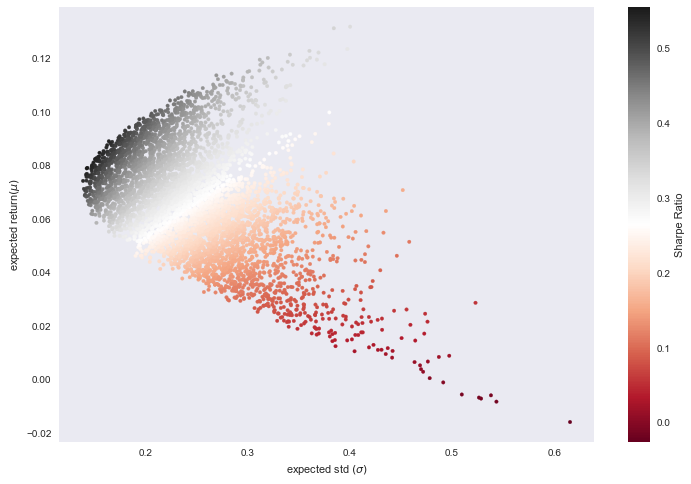

In [8]:
port_rets = []
port_std = []

def ret_std(weight, ret):
    port_mean = np.sum(weight * ret.mean() * 252)
    port_var = np.dot(weight.T, np.dot(ret.cov() * 252, weight))
    port_std = np.sqrt(port_var)
    return port_mean, port_std

for w in range(5000):
    weight = np.random.random(noa)
    weight /= np.sum(weight)
    mu, sig = ret_std(weight, ret)
#     print(mu, sig)
    port_rets.append(mu)
    port_std.append(sig)

sr = np.array(port_rets)/np.array(port_std)
    
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.scatter(port_std, port_rets, c=sr,marker='.',  cmap='RdGy')
plt.colorbar(label='Sharpe Ratio')
plt.ylabel('expected return$(μ)$')
plt.xlabel('expected std $(σ)$');
plt.grid()

* df_up

In [9]:
ret = df_up.drop(['goldFutures', 'Spain 10Y'], axis=1)
ret

,KOSPI,SPY,crudeOilFutures,naturalGasFutures,copperFutures
Unnamed: 0,,,,,
2000-01-03,0.000000,-0.009787,0.000000,0.000000,0.000000
2000-01-04,0.030124,-0.039106,-0.001953,-0.053913,-0.017009
2000-01-05,-0.068675,0.001789,-0.025049,-0.003676,0.011337
2000-01-06,-0.025874,-0.016072,-0.005219,0.012915,-0.002950
2000-01-07,-0.012635,0.058076,-0.022599,-0.010474,0.000592
...,...,...,...,...,...
2020-12-26,0.000000,0.000000,0.000000,0.000000,0.000000
2020-12-27,0.000000,0.000000,0.000000,0.000000,0.000000
2020-12-28,0.000620,0.008591,-0.012648,-0.076251,0.002386


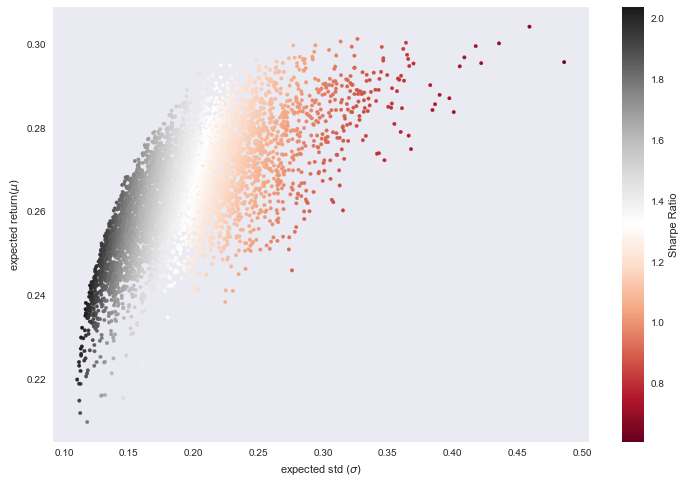

In [10]:
port_rets = []
port_std = []

def ret_std(weight, ret):
    port_mean = np.sum(weight * ret.mean() * 252)
    port_var = np.dot(weight.T, np.dot(ret.cov() * 252, weight))
    port_std = np.sqrt(port_var)
    return port_mean, port_std

for w in range(5000):
    weight = np.random.random(noa)
    weight /= np.sum(weight)
    mu, sig = ret_std(weight, ret)
#     print(mu, sig)
    port_rets.append(mu)
    port_std.append(sig)

sr = np.array(port_rets)/np.array(port_std)
    
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.scatter(port_std, port_rets, c=sr,marker='.',  cmap='RdGy')
plt.colorbar(label='Sharpe Ratio')
plt.ylabel('expected return$(μ)$')
plt.xlabel('expected std $(σ)$');
plt.grid()

* df_down

In [11]:
ret = df_down.drop(['goldFutures', 'Spain 10Y'], axis=1)
ret

,KOSPI,SPY,crudeOilFutures,naturalGasFutures,copperFutures
Unnamed: 0,,,,,
2000-04-03,-0.016842,0.005819,-0.017472,-0.019015,-0.003125
2000-04-04,-0.019233,-0.007438,-0.037079,-0.023191,-0.010658
2000-04-05,0.000000,-0.006245,0.014931,0.023388,-0.003169
2000-04-06,-0.031090,0.008693,-0.005420,0.023546,0.000000
2000-04-07,0.041064,0.006334,-0.025302,0.005074,-0.027336
...,...,...,...,...,...
2020-04-26,0.000000,0.000000,0.000000,0.000000,0.000000
2020-04-27,0.017872,0.014419,-0.245573,0.091652,-0.004235
2020-04-28,0.005887,-0.004599,-0.034429,-0.041176,-0.001276


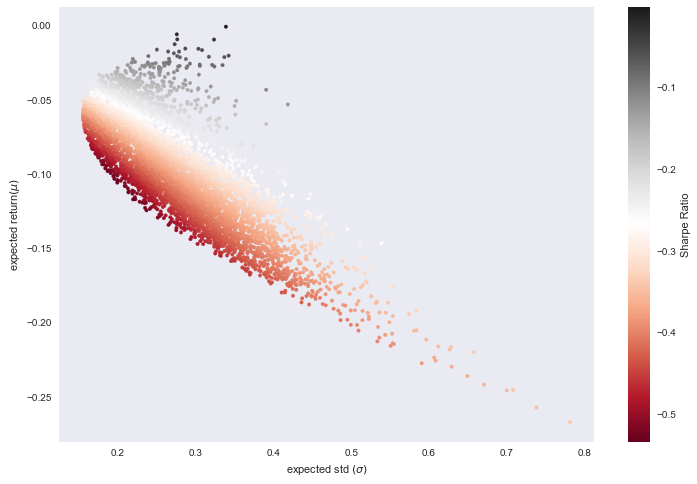

In [12]:
port_rets = []
port_std = []

def ret_std(weight, ret):
    port_mean = np.sum(weight * ret.mean() * 252)
    port_var = np.dot(weight.T, np.dot(ret.cov() * 252, weight))
    port_std = np.sqrt(port_var)
    return port_mean, port_std

for w in range(5000):
    weight = np.random.random(noa)
    weight /= np.sum(weight)
    mu, sig = ret_std(weight, ret)
#     print(mu, sig)
    port_rets.append(mu)
    port_std.append(sig)

sr = np.array(port_rets)/np.array(port_std)
    
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.scatter(port_std, port_rets, c=sr,marker='.',  cmap='RdGy')
plt.colorbar(label='Sharpe Ratio')
plt.ylabel('expected return$(μ)$')
plt.xlabel('expected std $(σ)$');
plt.grid()

(3) 모든 dataframe에 대해 무위험자산을 포함한 efficient frontier를 도출한 다음 이를 하나의 ($\mu, \sigma$) 공간에 표시하고, 서로의 annualized Sharpe Ratio를 비교하시오. (10점)

* df

In [15]:
ret = df.drop(['goldFutures', 'Spain 10Y'], axis=1)

port_rets = []
port_std = []

def ret_std(weight, ret):
    port_mean = np.sum(weight * ret.mean() *252)
    port_var = np.dot(weight.T, np.dot(ret.cov()*252, weight))
    port_std = np.sqrt(port_var)
    return port_mean, port_std

for w in range(5000):
    weight = np.random.random(noa)
    weight /= np.sum(weight)
    mu, sig = ret_std(weight, ret)
#     print(mu, sig)
    port_rets.append(mu)
    port_std.append(sig)

sr = np.array(port_rets)/np.array(port_std)

In [16]:
# 목적함수를 최소화하는 argument를 찾는 과정: Optimization


import scipy.optimize as opt

def statistics(weights, rf = 0):
    weights = np.array(weights)
    pret = np.sum(ret.mean() * weights) * 252 - rf
    pvol = np.sqrt(np.dot(weights.T, np.dot(ret.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol]) # 기대수익률, 분산, sharpe ratio


In [17]:
import scipy.optimize as opt

def min_func_sharpe(weights, rf=0.015):
    return -statistics(weights, rf)[2]

cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple([(0, 1) for x in range(noa)])
noa * [1. / noa,]

opts = opt.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

opts

     fun: -0.46181396492794013
     jac: array([-0.10041231, -0.10091231,  0.73078489, -0.10095076, -0.10084561])
 message: 'Optimization terminated successfully'
    nfev: 43
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.22789328, 0.369263  , 0.        , 0.13240433, 0.27043939])

In [18]:
rf = 0.015
slope = (statistics(opts['x'])[0] - rf) / statistics(opts['x'])[1]
var_list = [x*slope + rf for x in np.linspace(0.1,0.4,5000)]

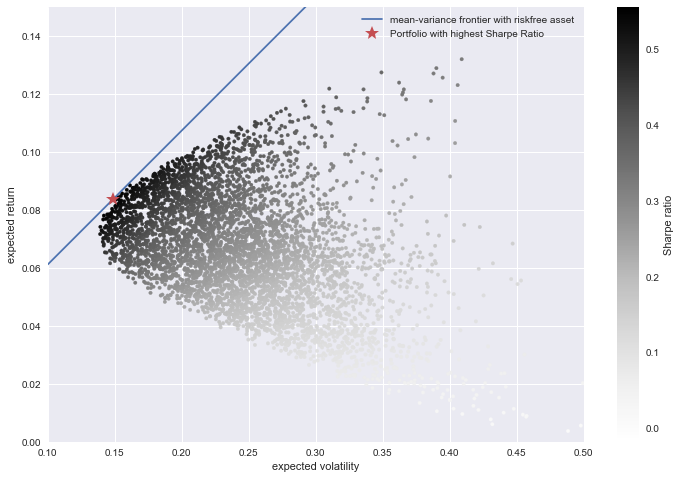

In [19]:
x =  np.linspace(0.1,0.4,5000)
y = var_list

plt.figure(figsize=(12, 8))
plt.scatter(port_std, port_rets,
            c=np.array(port_rets) / np.array(port_std), marker='.')
plt.plot(x,y, label = 'mean-variance frontier with riskfree asset')
            # random portfolio composition  
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=15.0, label = 'Portfolio with highest Sharpe Ratio')
            # portfolio with highest Sharpe ratio
plt.xlim((0.1, 0.5))
plt.ylim((0., 0.15))
plt.legend()
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')                    

In [20]:
slope

0.46181396492794013

* df_up

In [21]:
ret = df_up.drop(['goldFutures', 'Spain 10Y'], axis=1)

port_rets = []
port_std = []

def ret_std(weight, ret):
    port_mean = np.sum(weight * ret.mean() *252)
    port_var = np.dot(weight.T, np.dot(ret.cov()*252, weight))
    port_std = np.sqrt(port_var)
    return port_mean, port_std

for w in range(5000):
    weight = np.random.random(noa)
    weight /= np.sum(weight)
    mu, sig = ret_std(weight, ret)
#     print(mu, sig)
    port_rets.append(mu)
    port_std.append(sig)

sr = np.array(port_rets)/np.array(port_std)

In [22]:
# 목적함수를 최소화하는 argument를 찾는 과정: Optimization


import scipy.optimize as opt

def statistics(weights, rf = 0):
    weights = np.array(weights)
    pret = np.sum(ret.mean() * weights) * 252 - rf
    pvol = np.sqrt(np.dot(weights.T, np.dot(ret.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol]) # 기대수익률, 분산, sharpe ratio


In [23]:
import scipy.optimize as opt

def min_func_sharpe(weights, rf=0.015):
    return -statistics(weights, rf)[2]

cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple([(0, 1) for x in range(noa)])
noa * [1. / noa,]

opts = opt.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

opts

     fun: -1.917894332935648
     jac: array([-0.13226162, -0.13200715, -0.12866426, -0.13512675, -0.13226426])
 message: 'Optimization terminated successfully'
    nfev: 54
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.35739408, 0.3615213 , 0.06759426, 0.03057206, 0.18291829])

In [24]:
rf = 0.015
slope = (statistics(opts['x'])[0] - rf) / statistics(opts['x'])[1]
var_list = [x*slope + rf for x in np.linspace(0.1,0.4,5000)]

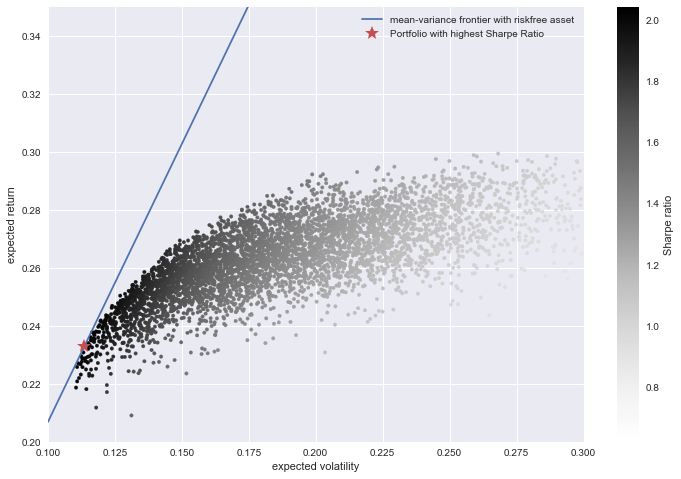

In [25]:
x =  np.linspace(0.1,0.4,5000)
y = var_list

plt.figure(figsize=(12, 8))
plt.scatter(port_std, port_rets,
            c=np.array(port_rets) / np.array(port_std), marker='.')
plt.plot(x,y, label = 'mean-variance frontier with riskfree asset')
            # random portfolio composition  
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=15.0, label = 'Portfolio with highest Sharpe Ratio')
            # portfolio with highest Sharpe ratio
plt.xlim((0.1, 0.3))
plt.ylim((0.2, 0.35))
plt.legend()
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')                    

In [26]:
slope

1.917894332935648

* df_down

In [27]:
ret = df_down.drop(['goldFutures', 'Spain 10Y'], axis=1)

port_rets = []
port_std = []

def ret_std(weight, ret):
    port_mean = np.sum(weight * ret.mean() *252)
    port_var = np.dot(weight.T, np.dot(ret.cov()*252, weight))
    port_std = np.sqrt(port_var)
    return port_mean, port_std

for w in range(5000):
    weight = np.random.random(noa)
    weight /= np.sum(weight)
    mu, sig = ret_std(weight, ret)
#     print(mu, sig)
    port_rets.append(mu)
    port_std.append(sig)

sr = np.array(port_rets)/np.array(port_std)

In [28]:
# 목적함수를 최소화하는 argument를 찾는 과정: Optimization


import scipy.optimize as opt

def statistics(weights, rf = 0):
    weights = np.array(weights)
    pret = np.sum(ret.mean() * weights) * 252 - rf
    pvol = np.sqrt(np.dot(weights.T, np.dot(ret.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol]) # 기대수익률, 분산, sharpe ratio


In [29]:
import scipy.optimize as opt

def min_func_sharpe(weights, rf=0.015):
    return -statistics(weights, rf)[2]

cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple([(0, 1) for x in range(noa)])
noa * [1. / noa,]

opts = opt.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

opts

     fun: -0.03737108678650529
     jac: array([ 0.14915435,  0.06390799,  0.64249535, -0.02855392,  0.17595023])
 message: 'Optimization terminated successfully'
    nfev: 18
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([2.69057183e-16, 2.91433544e-16, 2.22044605e-16, 1.00000000e+00,
       2.03158057e-16])

In [30]:
rf = 0.015
slope = (statistics(opts['x'])[0] - rf) / statistics(opts['x'])[1]
var_list = [x*slope + rf for x in np.linspace(0.2,0.6,5000)]

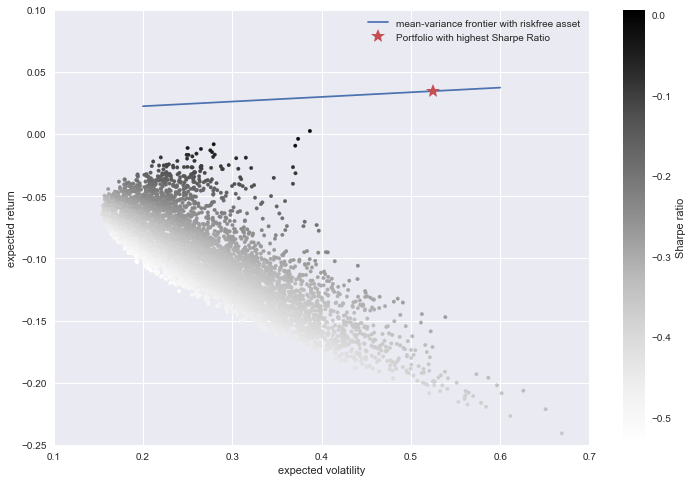

In [31]:
x =  np.linspace(0.2,0.6,5000)
y = var_list

plt.figure(figsize=(12, 8))
plt.scatter(port_std, port_rets,
            c=np.array(port_rets) / np.array(port_std), marker='.')
plt.plot(x,y, label = 'mean-variance frontier with riskfree asset')
            # random portfolio composition  
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=15.0, label = 'Portfolio with highest Sharpe Ratio')
            # portfolio with highest Sharpe ratio
plt.xlim((0.1, 0.7))
plt.ylim((-0.25, 0.1))
plt.legend()
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')                    

In [32]:
slope

0.03737108678650529

df: 0.46181396492794013
df_up: 1.917894332935648
df_down: 0.03737108678650529

(4) (3)번의 결과를 고려할 때, 경기 순환을 고려한 포트폴리오 운용이 실효성이 있는가? 그 근거는 무엇인가?  (10점)

경기 순환을 고려한 포트폴리오 운용은 실효성이 있다. 투자의 위험에 비해 얻게 되는 수익률을 의미하는 sharpe ratio가 df_up, df, df_down 순으로 높았기 때문이다. 이는 경기 확장기일 때(df_up) 경기 후퇴기(df_down)나 경기 전체(df)보다 투자의 효율성이 좋다는 것을 의미한다. 이는 동일한 위험에 대해서 높은 수익을 가져다 주는 것을 의미하므로 경기 순환에 따라 투자 상품의 비중을 조절할 수 있을 것이다.
또한 df_up은 평균적인 변동성도 0.1~0.4 수준으로 df와 df_down에 비해 비교적 낮으며, 기대수익률이 0.2~0.3으로 높은 편이다. 반면 df_down은 기대수익률이 대부분 음수이고 변동성도 0.15에서 0.7까지로 굉장히 크다. 따라서 경기 후퇴기에는 전체적인 수익률도 낮을 뿐더러 위험도 높지만, 경기 확장기에는 투자자가 감수해야 할 이는 전체적인 위험도 낮다는 것이므로, 이는 과감한 투자를 시도해볼 수 있는 근거가 될 것이다.

(5) 경기 순환의 국면별 tangency portfolio를 고려할 때, 경기가 확장/후퇴 할때 어떤 자산을 보유하고 있는게 좋은가? (5점)

경기가 확장할 때는 위험자산, 경기가 후퇴할 때는 안전자산의 비중을 높이는 것이 좋다. tangency portfolio는 위험 자산만 포함된 최적의 포트폴리오이다. 그런데 경기 확장기의 tangency portfolio에서 sharpe ratio는 1.917로 위험에 대한 보상을 받을 확률이 높은 반면, 경기 후퇴기의 tangency portfolio에서 sharpe ratio는 0.03737으로 위험을 감수한 만큼의 수익이 돌아오지 않을 확률이 높다. 따라서 경기 확장기에는 불확실성이 있더라도 높은 수익률을 기대할 수 있는 위험자산을, 위험 부담 없이 수익률이 확실한 안전자산을 택하는 것이 바람직하다.